# *Installing and loading the Dataset*

In [1]:
!pip3 install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 19.0 MB/s eta 0:00:00


In [2]:
!pip install spacy nltk


In [3]:
import spacy

In [4]:
from datasets import load_dataset

dataset = load_dataset("surrey-nlp/PLOD-CW")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

## Installing necessary packages and libraries


In [5]:
import spacy
import nltk
from nltk.stem.porter import PorterStemmer

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Initialize NLTK's Porter Stemmer
stemmer = PorterStemmer()




In [6]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk
import numpy as np
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss

## Create 3 different Dataframe for further Analysis

In [7]:
df = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])
df_valid =pd.DataFrame(dataset['validation'])

In [8]:
df.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


In [9]:
df_test.head()

,tokens,pos_tags,ner_tags
0,"[Abbreviations, :, GEMS, ,, Global, Enteric, M...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, PROPN, PROP...","[B-O, B-O, B-AC, B-O, B-LF, I-LF, I-LF, I-LF, ..."
1,"[Fractions, from, FPLC, purification, were, tr...","[NOUN, ADP, PROPN, NOUN, AUX, VERB, ADP, PROPN...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, ..."
2,"[We, developed, a, variant, of, gene, set, enr...","[PRON, VERB, DET, NOUN, ADP, NOUN, NOUN, NOUN,...","[B-O, B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-..."
3,"[Red, represents, samples, having, the, normal...","[NOUN, VERB, NOUN, VERB, DET, VERB, PROPN, CCO...","[B-O, B-O, B-O, B-O, B-O, B-O, B-AC, B-O, B-O,..."
4,"[(, D, ), Lysates, of, rectal, cancer, tissues...","[PUNCT, X, PUNCT, NOUN, ADP, ADJ, NOUN, NOUN, ...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, ..."


## Flatteing 3 different Dataframe

In [10]:
#For df_Train
df['Tokens'] = df['tokens'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df['NER'] = df['ner_tags'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

tokens = [token for sublist in df['Tokens'] for token in sublist]
ner_tags = [tag for sublist in df['NER'] for tag in sublist]

flat_df = pd.DataFrame({'Token': tokens, 'Ner_Tag': ner_tags})

In [11]:
flat_df.head()

,Token,Ner_Tag
0,For,B-O
1,this,B-O
2,purpose,B-O
3,the,B-O
4,Gothenburg,B-LF


In [12]:
#For df_test
df_test['Tokens'] = df_test['tokens'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_test['NER'] = df_test['ner_tags'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

tokens_test = [token for sublist in df_test['Tokens'] for token in sublist]
ner_tags_test = [tag for sublist in df_test['NER'] for tag in sublist]

flat_df_test= pd.DataFrame({'Token': tokens_test, 'Ner_Tag': ner_tags_test})

In [13]:
flat_df_test.head()

,Token,Ner_Tag
0,Abbreviations,B-O
1,:,B-O
2,GEMS,B-AC
3,",",B-O
4,Global,B-LF


In [14]:
#For df_valid
df_valid['Tokens'] = df_valid['tokens'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_valid['NER'] = df_valid['ner_tags'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

tokens_valid = [token for sublist in df_valid['Tokens'] for token in sublist]
ner_tags_valid = [tag for sublist in df_valid['NER'] for tag in sublist]

flat_df_valid= pd.DataFrame({'Token': tokens_valid, 'Ner_Tag': ner_tags_valid})

In [15]:
flat_df_valid.head()

,Token,Ner_Tag
0,=,B-O
1,Manual,B-LF
2,Ability,I-LF
3,Classification,I-LF
4,System,I-LF


In [16]:
print(flat_df.shape)
print(flat_df_test.shape)
print(flat_df_valid.shape)

(40000, 2)
(5000, 2)
(5000, 2)


In [17]:
flat_df_valid.head()

,Token,Ner_Tag
0,=,B-O
1,Manual,B-LF
2,Ability,I-LF
3,Classification,I-LF
4,System,I-LF


### **System 1: Preprocessing(Steamming and Lemmatization), Tfidf Vectorization, KNN**

In the below code we are defining a function ***Preprocess*** that will help us to Stem and Lemmatize dataset

In [18]:

def preprocess(text):

    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct]

    # Apply stemming to the lemmatized tokens
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    if not stemmed_tokens:
        return np.nan

    return ' '.join(stemmed_tokens)

In [19]:
#creating copies to be used in this experiment
flat_df1=flat_df
flat_df1_test=flat_df_test
flat_df1_valid=flat_df_valid

In [20]:
flat_df.shape

(40000, 2)

In the below 3 codes we are basically cleaning the data that has NA values after Stemming and lemmatization

In [21]:
#for train data
print('Shape Before' , flat_df1.shape)
flat_df1['text_for_tfidf'] = flat_df1['Token'].apply(preprocess)
flat_df1_clean = flat_df1.dropna()
print('Shape After' , flat_df1_clean.shape)

Shape Before (40000, 2)
Shape After (30630, 3)


In [22]:
flat_df1_clean.head()

,Token,Ner_Tag,text_for_tfidf
0,For,B-O,for
1,this,B-O,thi
2,purpose,B-O,purpos
3,the,B-O,the
4,Gothenburg,B-LF,gothenburg


In [23]:
#for test data
print('Shape Before' , flat_df1_test.shape)
flat_df1_test['text_for_tfidf'] = flat_df1_test['Token'].apply(preprocess)
flat_df1_test_clean = flat_df1_test.dropna()
print('Shape After' , flat_df1_test_clean.shape)

Shape Before (5000, 2)
Shape After (3884, 3)


In [24]:
flat_df1_test_clean.head()

,Token,Ner_Tag,text_for_tfidf
0,Abbreviations,B-O,abbrevi
2,GEMS,B-AC,gem
4,Global,B-LF,global
5,Enteric,I-LF,enter
6,Multicenter,I-LF,multicent


In [25]:
#for Valid data
print('Shape Before' , flat_df1_valid.shape)
flat_df1_valid['text_for_tfidf'] = flat_df1_valid['Token'].apply(preprocess)
flat_df1_valid_clean = flat_df1_valid.dropna()
print('Shape After' , flat_df1_valid_clean.shape)

Shape Before (5000, 2)
Shape After (3875, 3)


In [26]:
flat_df1_valid_clean.head()

,Token,Ner_Tag,text_for_tfidf
0,=,B-O,=
1,Manual,B-LF,manual
2,Ability,I-LF,abil
3,Classification,I-LF,classif
4,System,I-LF,system


Vectorizing Tokens using TFIDF

In [27]:
#creating a instance of calss Tfidfvectorizer
tfidf_vectorizer = TfidfVectorizer()

In [28]:
#creating X_Train, X_Test,X_valid for model creation
X =  flat_df1_clean['text_for_tfidf']
y = flat_df1_clean['Ner_Tag']


In [29]:
X_test = flat_df1_test_clean['text_for_tfidf']
y_test = flat_df1_test_clean['Ner_Tag']
X_valid = flat_df1_valid_clean['text_for_tfidf']
y_valid = flat_df1_valid_clean['Ner_Tag']

In [30]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X)


In [31]:
print(y_test)

0        B-O
2       B-AC
4       B-LF
5       I-LF
6       I-LF
        ... 
4994    B-LF
4995    I-LF
4996    I-LF
4997    I-LF
4999    B-AC
Name: Ner_Tag, Length: 3884, dtype: object


In [32]:
X_train_tfidf

<30630x6333 sparse matrix of type '<class 'numpy.float64'>'
	with 29331 stored elements in Compressed Sparse Row format>

In [33]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_valid_tfidf=tfidf_vectorizer.transform(X_valid)

In [34]:
X_test_tfidf

<3884x6333 sparse matrix of type '<class 'numpy.float64'>'
	with 3170 stored elements in Compressed Sparse Row format>

In [35]:
X_valid_tfidf

<3875x6333 sparse matrix of type '<class 'numpy.float64'>'
	with 3165 stored elements in Compressed Sparse Row format>

In [36]:
print(y)

0         B-O
1         B-O
2         B-O
3         B-O
4        B-LF
         ... 
39995     B-O
39996     B-O
39997     B-O
39998     B-O
39999     B-O
Name: Ner_Tag, Length: 30630, dtype: object


Training the KNN classifier model with X_train_tfidf and y (Ner Tag)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)

In [38]:
knn_model.fit(X_train_tfidf, y)

KNeighborsClassifier(n_neighbors=10)

Testing (prediction using X_test_tfiddf)

In [39]:
print(y_test)

0        B-O
2       B-AC
4       B-LF
5       I-LF
6       I-LF
        ... 
4994    B-LF
4995    I-LF
4996    I-LF
4997    I-LF
4999    B-AC
Name: Ner_Tag, Length: 3884, dtype: object


In [40]:
y_pred = knn_model.predict(X_test_tfidf)

# Generate a classification report to evaluate the model
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

        B-AC       0.80      0.12      0.21       270
        B-LF       0.35      0.05      0.09       150
         B-O       0.84      0.99      0.91      3201
        I-LF       0.62      0.14      0.22       263

    accuracy                           0.83      3884
   macro avg       0.65      0.33      0.36      3884
weighted avg       0.80      0.83      0.78      3884



In [41]:
print(y_pred)

['B-O' 'B-O' 'B-O' ... 'B-O' 'B-O' 'B-O']


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Hamming Loss:", hamming_loss(y_test, y_pred))

Accuracy: 0.8344490216271885
Precision: 0.6536089474615397
Recall: 0.3252196992463936
F1 Score: 0.3594517351618455
Hamming Loss: 0.16555097837281155


In [43]:
df_predicted= pd.DataFrame({
    'X_test': X_test,
    'y_test': y_test,
    'y_pred': y_pred
})

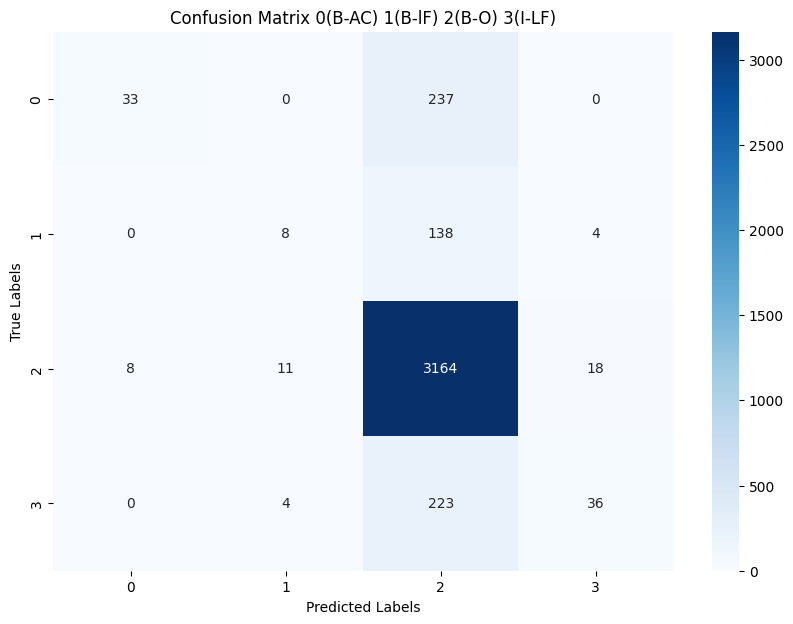

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix 0(B-AC) 1(B-lF) 2(B-O) 3(I-LF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [45]:
df_predicted.head(50)

,X_test,y_test,y_pred
0,abbrevi,B-O,B-O
2,gem,B-AC,B-O
4,global,B-LF,B-O
5,enter,I-LF,B-O
6,multicent,I-LF,B-O
7,studi,I-LF,B-O
9,vip,B-AC,B-O
11,ventil,B-LF,B-O
12,improv,I-LF,B-O
13,pit,I-LF,B-O



**Validation Using X_valid_tfidf**

In [46]:
y_predv = knn_model.predict(X_valid_tfidf)

# Generate a classification report to evaluate the model
report = classification_report(y_valid, y_predv)

print(report)

              precision    recall  f1-score   support

        B-AC       0.80      0.09      0.16       263
        B-LF       0.50      0.07      0.13       149
         B-O       0.83      0.99      0.90      3174
        I-LF       0.55      0.10      0.17       289

    accuracy                           0.83      3875
   macro avg       0.67      0.31      0.34      3875
weighted avg       0.80      0.83      0.77      3875



In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
print("Accuracy:", accuracy_score(y_valid, y_predv))
print("Precision:", precision_score(y_valid, y_predv, average='macro'))
print("Recall:", recall_score(y_valid, y_predv, average='macro'))
print("F1 Score:", f1_score(y_valid, y_predv, average='macro'))
print("Hamming Loss:", hamming_loss(y_valid, y_predv))

Accuracy: 0.8263225806451613
Precision: 0.6698826385065813
Recall: 0.3135210304898024
F1 Score: 0.3414674957375824
Hamming Loss: 0.1736774193548387


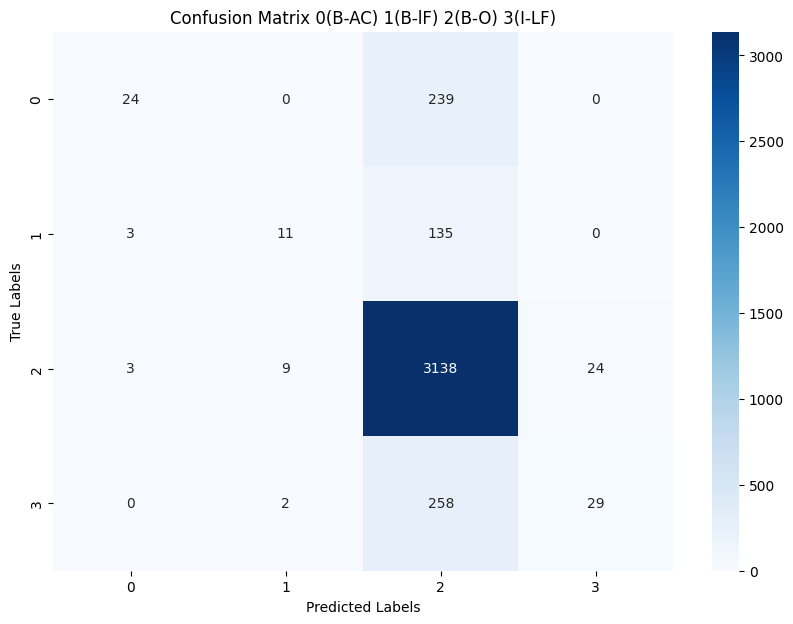

In [48]:
cm = confusion_matrix(y_valid, y_predv)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix 0(B-AC) 1(B-lF) 2(B-O) 3(I-LF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **System 2: Preprocessing(Steamming and Lemmatization), Tfidf Vectorization, SVM**

*We will be using X_train_tfidf , X_test_tfidf and X_valid_tfidf created in the last system/model*

Training using X_train_tfidf

In [49]:

svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train_tfidf, y)



SVC(kernel='linear')

**Testing using X_test_Tfidf**

In [50]:

y_pred1 = svm_model.predict(X_test_tfidf)


report = classification_report(y_test, y_pred1)

print(report)

              precision    recall  f1-score   support

        B-AC       0.78      0.35      0.48       270
        B-LF       0.28      0.06      0.10       150
         B-O       0.86      0.96      0.91      3201
        I-LF       0.37      0.19      0.25       263

    accuracy                           0.83      3884
   macro avg       0.57      0.39      0.44      3884
weighted avg       0.80      0.83      0.80      3884



In [51]:

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1, average='macro'))
print("Recall:", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred1, average='macro'))
print("Hamming Loss:", hamming_loss(y_test, y_pred1))

Accuracy: 0.8341915550978373
Precision: 0.57329222075495
Recall: 0.3906620864809489
F1 Score: 0.4351042397293068
Hamming Loss: 0.16580844490216273


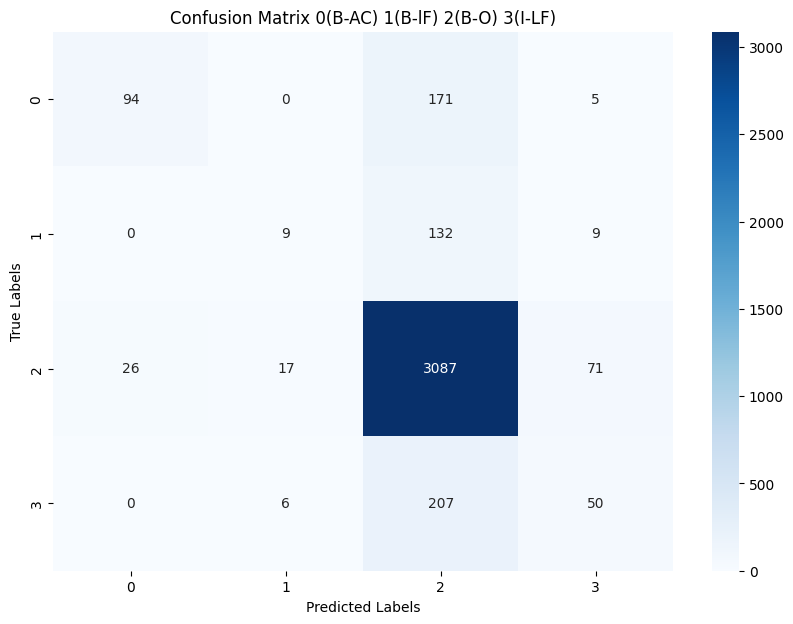

In [52]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix 0(B-AC) 1(B-lF) 2(B-O) 3(I-LF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [53]:
df_predicted_SVM= pd.DataFrame({
    'X_test': X_test,
    'y_test': y_test,
    'y_pred': y_pred1
})

In [54]:
df_predicted_SVM.head(50)

,X_test,y_test,y_pred
0,abbrevi,B-O,B-O
2,gem,B-AC,B-O
4,global,B-LF,B-O
5,enter,I-LF,B-O
6,multicent,I-LF,B-O
7,studi,I-LF,B-O
9,vip,B-AC,B-O
11,ventil,B-LF,B-O
12,improv,I-LF,B-O
13,pit,I-LF,B-O


**Validation Using X_valid_tfidf**

In [55]:
y_predv = svm_model.predict(X_valid_tfidf)

# Generate a classification report to evaluate the model
report = classification_report(y_valid, y_predv)

print(report)

              precision    recall  f1-score   support

        B-AC       0.82      0.39      0.53       263
        B-LF       0.50      0.07      0.13       149
         B-O       0.86      0.97      0.91      3174
        I-LF       0.47      0.22      0.30       289

    accuracy                           0.84      3875
   macro avg       0.66      0.41      0.47      3875
weighted avg       0.81      0.84      0.81      3875



In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
print("Accuracy:", accuracy_score(y_valid, y_predv))
print("Precision:", precision_score(y_valid, y_predv, average='macro'))
print("Recall:", recall_score(y_valid, y_predv, average='macro'))
print("F1 Score:", f1_score(y_valid, y_predv, average='macro'))
print("Hamming Loss:", hamming_loss(y_valid, y_predv))

Accuracy: 0.8407741935483871
Precision: 0.6604666012655991
Recall: 0.41353824920533067
F1 Score: 0.46652947132008415
Hamming Loss: 0.1592258064516129


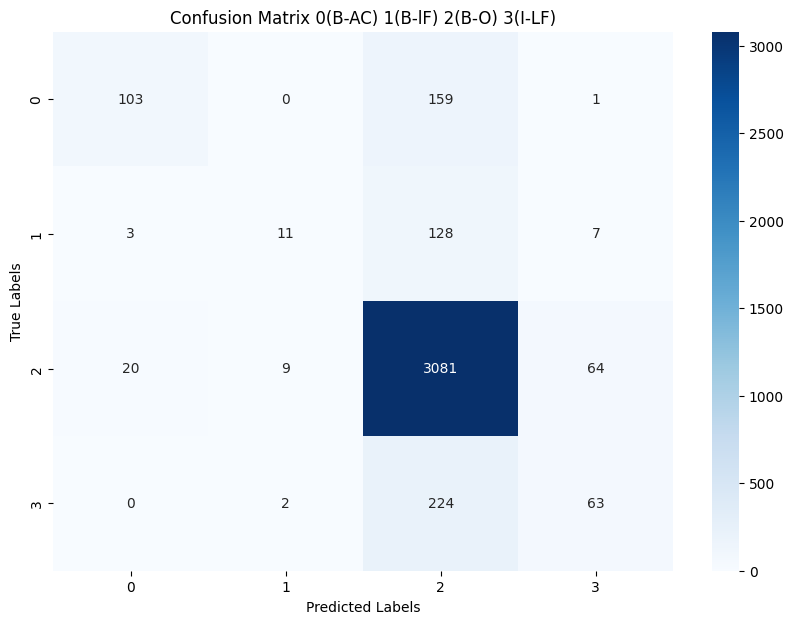

In [57]:
cm = confusion_matrix(y_valid, y_predv)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix 0(B-AC) 1(B-lF) 2(B-O) 3(I-LF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **System 3: Preprocessing(Bigram), Tfidf Vectorization, KNN**

In [58]:
df['Tokens'] = df['tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
df['NER'] = df['ner_tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [59]:
df_test['Tokens'] = df_test['tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
df_test['NER'] = df_test['ner_tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [60]:
df_valid['Tokens'] = df_valid['tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
df_valid['NER'] = df_valid['ner_tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [61]:
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

In [62]:
X = vectorizer.fit_transform(df['Tokens'])
X_test= vectorizer.transform(df_test['Tokens'])
X_valid= vectorizer.transform(df_valid['Tokens'])

In [63]:
print(X)

  (0, 21574)	0.2774330267347462
  (0, 8694)	0.306605398110339
  (0, 17162)	0.306605398110339
  (0, 6810)	0.306605398110339
  (0, 14951)	0.306605398110339
  (0, 22457)	0.306605398110339
  (0, 8553)	0.306605398110339
  (0, 19344)	0.306605398110339
  (0, 15951)	0.306605398110339
  (0, 20049)	0.306605398110339
  (0, 7936)	0.2774330267347462
  (1, 4593)	0.1985311803979891
  (1, 4736)	0.1985311803979891
  (1, 4981)	0.1985311803979891
  (1, 4737)	0.1985311803979891
  (1, 10475)	0.1985311803979891
  (1, 2023)	0.1985311803979891
  (1, 22535)	0.1985311803979891
  (1, 15187)	0.1985311803979891
  (1, 16146)	0.1985311803979891
  (1, 15053)	0.1985311803979891
  (1, 12949)	0.1985311803979891
  (1, 8700)	0.1985311803979891
  (1, 12436)	0.1985311803979891
  (1, 16141)	0.1985311803979891
  :	:
  (1070, 2734)	0.22251448603000162
  (1070, 11111)	0.22251448603000162
  (1070, 10726)	0.22251448603000162
  (1070, 693)	0.22251448603000162
  (1070, 13437)	0.22251448603000162
  (1070, 17671)	0.22251448603000162


In [64]:
y_train = df['ner_tags']
y_test =  df_test['ner_tags']
y_valid =  df_valid['ner_tags']

Encoding Ner Tags using Multibinarizer

In [65]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train_binarized = mlb.fit_transform(y_train)
y_test_binarized = mlb.transform(y_test)
y_valid_binarized = mlb.transform(y_valid)

In [66]:
print(y_train_binarized )

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [1 1 1 1]
 [1 1 1 1]
 [0 0 1 0]]


*Training*

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize  KNN model
knn = KNeighborsClassifier(n_neighbors=25)  # You can tune this parameter

# Train KNN model
knn.fit(X, y_train_binarized)

KNeighborsClassifier(n_neighbors=25)

*Testing*

In [68]:
print(y_test_binarized[:10])

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 0 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 0 1 0]
 [0 0 1 0]
 [1 1 1 1]]


In [69]:
y_pred = knn.predict(X_test)

In [70]:
print(y_pred[:5])

[[1 1 1 1]
 [1 0 1 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 0 1 0]]


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
print("Accuracy:", accuracy_score(y_test_binarized, y_pred))
print("Precision:", precision_score(y_test_binarized, y_pred, average='samples'))
print("Recall:", recall_score(y_test_binarized, y_pred, average='samples'))
print("F1 Score:", f1_score(y_test_binarized, y_pred, average='samples'))
print("Hamming Loss:", hamming_loss(y_test_binarized, y_pred))

Accuracy: 0.5294117647058824
Precision: 0.8431372549019608
Recall: 0.9264705882352942
F1 Score: 0.8379707438530968
Hamming Loss: 0.21895424836601307


In [72]:


report = classification_report(y_test_binarized, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       131
           1       0.76      0.86      0.80       113
           2       1.00      1.00      1.00       153
           3       0.66      0.76      0.71       100

   micro avg       0.83      0.91      0.87       497
   macro avg       0.82      0.90      0.86       497
weighted avg       0.84      0.91      0.87       497
 samples avg       0.84      0.93      0.84       497



*Validation*

In [73]:
y_predv = knn.predict(X_valid)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
print("Accuracy:", accuracy_score(y_valid_binarized, y_predv))
print("Precision:", precision_score(y_valid_binarized, y_predv, average='samples'))
print("Recall:", recall_score(y_valid_binarized, y_predv, average='samples'))
print("F1 Score:", f1_score(y_valid_binarized, y_predv, average='samples'))
print("Hamming Loss:", hamming_loss(y_valid_binarized, y_predv))

Accuracy: 0.6111111111111112
Precision: 0.8974867724867724
Recall: 0.9292328042328042
F1 Score: 0.8823885109599398
Hamming Loss: 0.16071428571428573


In [75]:


report = classification_report(y_valid_binarized, y_predv)

print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       116
           1       0.85      0.87      0.86       101
           2       1.00      1.00      1.00       126
           3       0.78      0.78      0.78        90

   micro avg       0.90      0.92      0.91       433
   macro avg       0.89      0.91      0.90       433
weighted avg       0.90      0.92      0.91       433
 samples avg       0.90      0.93      0.88       433

